In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Setting up PySpark in Colab

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 .


In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-19 16:19:21--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  43.2MB/s    in 5.3s    

2022-05-19 16:19:26 (49.3 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



Unzip the folder



In [1]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz


Install and locate Spark on the system and import it as a regular library.



In [2]:
!pip install -q findspark

Set environment path



In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


Locate spark in system

In [4]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Big Data Management Assignment")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.

In [7]:
spark

#Exploratory Data Analysis (EDA)

Import Library

In [8]:
import pyspark.pandas as ps
from pyspark.sql.functions import *
import pandas as pd

Load data into Spark

In [10]:
userDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/users.csv", header=True, inferSchema=True)
#userDf = userDf.toPandas()
userDf

DataFrame[timestamp: string, userId: int, nick: string, twitter: string, dob: string, country: string]

In [11]:
userDf.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- userId: integer (nullable = true)
 |-- nick: string (nullable = true)
 |-- twitter: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- country: string (nullable = true)



In [12]:
userDf = userDf.withColumn("dob", to_date(userDf.dob))
userDf = userDf.withColumn("Age",year(current_date())-year(userDf.dob))

In [14]:
userDf.show()

+-------------------+------+-----------+----------+----------+-------+---+
|          timestamp|userId|       nick|   twitter|       dob|country|Age|
+-------------------+------+-----------+----------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 51|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 52|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF| 71|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO| 43|
|2012-06-23 17:57:05|  22

In [15]:
userSessionDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/user-session.csv", header=True, inferSchema=True)
#userSessionDf = userSessionDf.toPandas()

In [16]:
userSessionDf = userSessionDf.select('userId', 'teamId', 'platformType')
userSessionDf = userSessionDf.dropDuplicates(['userId'])

In [17]:
master = userDf.join(userSessionDf, on = 'userId', how = 'outer')

In [18]:
master.count()

2393

In [19]:
master.toPandas()

,userId,timestamp,nick,twitter,dob,country,Age,teamId,platformType
0,0,2015-11-27 16:36:39,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,73,157.0,iphone
1,1,2012-12-17 03:25:44,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,42,99.0,android
2,2,2013-03-18 23:19:59,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,40,22.0,iphone
3,3,2015-03-08 21:58:07,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,60,NaN,None
4,4,2015-07-02 06:39:41,nuubto,@U0eEX,1950-12-10,TO,72,NaN,None
...,...,...,...,...,...,...,...,...,...
2388,2388,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27,NaN,None
2389,2389,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39,57.0,android
2390,2390,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31,NaN,None
2391,2391,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41,NaN,None


In [20]:
teamDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/team.csv", header=True, inferSchema=True)

In [21]:
teamDf.toPandas()

,teamId,name,teamCreationTime,teamEndTime,strength,currentLevel
0,79,O1uJX7C,2016-06-12 15:33:27,9999-12-31 23:59:59,0.774474,1
1,92,WeLHp8HZ,2016-06-12 21:54:20,9999-12-31 23:59:59,0.171926,1
2,6,mARlfz,2016-06-12 23:02:16,9999-12-31 23:59:59,0.537353,1
3,7,xO41jlAo0Y,2016-06-13 06:03:03,9999-12-31 23:59:59,0.394370,1
4,40,vdwO0k1,2016-06-13 07:01:03,9999-12-31 23:59:59,0.706833,1
...,...,...,...,...,...,...
104,143,PtTdlOTqmQE,2016-06-02 17:36:54,2016-06-02 22:06:54,0.060460,1
105,161,vBm7Odv,2016-06-07 19:36:54,2016-06-08 06:06:54,0.994851,1
106,165,ZLKJDq,2016-06-09 01:06:54,2016-06-09 20:06:54,0.073988,1
107,171,h53FOIyWf8,2016-06-10 11:06:54,2016-06-10 14:06:54,0.225849,1


In [22]:
teamDf = teamDf.select('teamId','strength')
teamDf = teamDf.dropDuplicates(['teamId'])
master = master.join(teamDf, on = 'teamId', how = "outer")

In [23]:
master.toPandas()

,teamId,userId,timestamp,nick,twitter,dob,country,Age,platformType,strength
0,NaN,3.0,2015-03-08 21:58:07,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,60.0,None,NaN
1,NaN,4.0,2015-07-02 06:39:41,nuubto,@U0eEX,1950-12-10,TO,72.0,None,NaN
2,NaN,5.0,2013-12-25 00:56:05,Ls5CGWqVus,@ygWiqAHR,1997-07-11,ST,25.0,None,NaN
3,NaN,7.0,2015-10-05 02:34:31,YXEMpCb2,@YMzAcB,1948-03-20,TF,74.0,None,NaN
4,NaN,11.0,2016-01-24 13:15:33,cERkN5Zq,@LMhNpt6,1990-01-09,KI,32.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...
2453,173.0,26.0,2016-05-19 03:48:54,Fqoksu9,@WElcqj9,1984-10-19,MM,38.0,windows,NaN
2454,173.0,1786.0,2015-09-11 15:52:52,8Ct743g,@WUiwX0,1989-10-05,EC,33.0,android,NaN
2455,177.0,1371.0,2013-11-23 17:12:01,b3SUSB,@YqicOY9i,1969-09-01,TP,53.0,mac,NaN
2456,179.0,1335.0,2013-08-04 05:14:50,YmTBrL,@gWg1rXJEw,1981-06-25,GF,41.0,windows,NaN


In [24]:
gameDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/game-clicks.csv", header=True, inferSchema=True)

In [25]:
gameDf.toPandas()

,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel
0,2016-05-26 15:06:55,105,1038,5916,0,25,1
1,2016-05-26 15:07:09,154,1099,5898,0,44,1
2,2016-05-26 15:07:14,229,899,5757,0,71,1
3,2016-05-26 15:07:14,322,2197,5854,0,99,1
4,2016-05-26 15:07:20,22,1362,5739,0,13,1
...,...,...,...,...,...,...,...
755801,2016-06-16 11:06:39,755047,664,38792,1,84,8
755802,2016-06-16 11:06:44,755006,2374,34634,1,72,8
755803,2016-06-16 11:06:46,755521,1402,33063,1,141,6
755804,2016-06-16 11:06:50,755592,290,37357,1,146,6


In [26]:
gameDf = gameDf.groupBy("userId").agg(sum("isHit").alias("sum_isHit"), count("clickId").alias("count_clickId"))
gameDf.dropDuplicates()
master = master.join(gameDf,on = "userId", how ="outer")

In [27]:
master.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27.0,None,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39.0,android,0.085990,105.0,915.0
2455,2390.0,NaN,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31.0,None,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41.0,None,NaN,NaN,NaN


In [28]:
adDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
adDf = adDf.groupBy("userId").agg(count("adId").alias("count_adId"))
adDf.dropDuplicates()
master = master.join(adDf, on = "userId", how = "outer")

In [29]:
adDf.toPandas()

,userId,count_adId
0,1645,41
1,471,51
2,2142,46
3,2122,17
4,243,56
...,...,...
592,208,37
593,2208,42
594,36,19
595,2057,4


In [30]:
master.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27.0,None,NaN,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39.0,android,0.085990,105.0,915.0,NaN
2455,2390.0,NaN,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31.0,None,NaN,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41.0,None,NaN,NaN,NaN,NaN


In [31]:
buyDf = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dataset/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

In [32]:
buyDf.toPandas()

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [33]:
buyDf =  buyDf.groupBy("userId").agg(count("buyId").alias("count_buyId"), sum("price").alias("sum_price"))
buyDf.dropDuplicates()
master = master.join(buyDf, on="userId", how="outer")

In [34]:
master.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId,count_buyId,sum_price
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27.0,None,NaN,NaN,NaN,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39.0,android,0.085990,105.0,915.0,NaN,NaN,NaN
2455,2390.0,NaN,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31.0,None,NaN,NaN,NaN,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41.0,None,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Final_master = master.na.drop(subset='userId')

In [36]:
Final_master.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId,count_buyId,sum_price
0,0,157.0,2015-11-27 16:36:39,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,73,iphone,NaN,143.0,1355.0,NaN,NaN,NaN
1,1,99.0,2012-12-17 03:25:44,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,42,android,0.893054,96.0,716.0,44.0,9.0,21.0
2,2,22.0,2013-03-18 23:19:59,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,40,iphone,0.472692,22.0,231.0,NaN,NaN,NaN
3,3,NaN,2015-03-08 21:58:07,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,60,None,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,2015-07-02 06:39:41,nuubto,@U0eEX,1950-12-10,TO,72,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,NaN,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27,None,NaN,NaN,NaN,NaN,NaN,NaN
2389,2389,57.0,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39,android,0.085990,105.0,915.0,NaN,NaN,NaN
2390,2390,NaN,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31,None,NaN,NaN,NaN,NaN,NaN,NaN
2391,2391,NaN,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41,None,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Final_master = Final_master.withColumnRenamed("sum_isHit","Total_Hit").withColumnRenamed("count_clickId","Game_Clicked_Count").withColumnRenamed("count_adId","Ad_Count").withColumnRenamed("count_buyId","Purchase_count").withColumnRenamed("sum_price","Total_Purchase")

In [38]:
Final_master = Final_master.withColumn("Bought_Items", (Final_master.Total_Purchase >= 1).cast("integer"))

In [39]:
Final_master.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157.0,2015-11-27 16:36:39,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,73,iphone,NaN,143.0,1355.0,NaN,NaN,NaN,NaN
1,1,99.0,2012-12-17 03:25:44,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,42,android,0.893054,96.0,716.0,44.0,9.0,21.0,1.0
2,2,22.0,2013-03-18 23:19:59,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,40,iphone,0.472692,22.0,231.0,NaN,NaN,NaN,NaN
3,3,NaN,2015-03-08 21:58:07,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,60,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,2015-07-02 06:39:41,nuubto,@U0eEX,1950-12-10,TO,72,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,NaN,2013-04-04 04:53:49,SP67Pry,@0Za771cOj,1995-12-19,TJ,27,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,2389,57.0,2013-04-30 12:16:40,U0mTMwAG4J,@nxS820,1983-12-12,HK,39,android,0.085990,105.0,915.0,NaN,NaN,NaN,NaN
2390,2390,NaN,2016-06-15 16:33:25,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2391,2391,NaN,2014-01-06 13:15:05,5fZ9zu1,@SdP0z,1981-03-03,GA,41,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Identify Null Values
Final_master.select([count(when(col(c).isNull(), c)).alias(c) for c in Final_master.columns]).show()

+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|userId|teamId|timestamp|nick|twitter|dob|country|Age|platformType|strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|Bought_Items|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|     0|  1300|        0|   0|      0|  0|      0|  0|        1300|    1691|     1200|              1200|    1796|          1847|          1847|        1847|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+



In [41]:
Final_master = Final_master.fillna(value=0,subset=["teamId"])
Final_master = Final_master.fillna(value="No Platform",subset=["platformType"])
Final_master = Final_master.fillna(value=0,subset=["strength"])
Final_master = Final_master.fillna(value=0,subset=["Total_Hit"])
Final_master = Final_master.fillna(value=0,subset=["Game_Clicked_Count"])
Final_master = Final_master.fillna(value=0,subset=["Ad_Count"])
Final_master = Final_master.fillna(value=0,subset=["Purchase_count"])
Final_master = Final_master.fillna(value=0,subset=["Total_Purchase"])
Final_master = Final_master.fillna(value=0,subset=["Bought_Items"])

In [42]:
#See NULL values after replacing values
Final_master.select([count(when(col(c).isNull(), c)).alias(c) for c in Final_master.columns]).show()

+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|userId|teamId|timestamp|nick|twitter|dob|country|Age|platformType|strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|Bought_Items|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|     0|     0|        0|   0|      0|  0|      0|  0|           0|       0|        0|                 0|       0|             0|             0|           0|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+



In [43]:
Final_master.dtypes

[('userId', 'int'),
 ('teamId', 'int'),
 ('timestamp', 'string'),
 ('nick', 'string'),
 ('twitter', 'string'),
 ('dob', 'date'),
 ('country', 'string'),
 ('Age', 'int'),
 ('platformType', 'string'),
 ('strength', 'double'),
 ('Total_Hit', 'bigint'),
 ('Game_Clicked_Count', 'bigint'),
 ('Ad_Count', 'bigint'),
 ('Purchase_count', 'bigint'),
 ('Total_Purchase', 'double'),
 ('Bought_Items', 'int')]

In [44]:
Final_master = Final_master.withColumn("Total_Hit", Final_master.Total_Hit.cast('int'))
Final_master = Final_master.withColumn("Game_Clicked_Count", Final_master.Game_Clicked_Count.cast('int'))
Final_master = Final_master.withColumn("Ad_Count", Final_master.Ad_Count.cast('int'))
Final_master = Final_master.withColumn("Purchase_count", Final_master.Purchase_count.cast('int'))

In [45]:
#check for duplicates.
#Results: No Duplicate as the number of rows are still the same
Final_master.distinct().toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,351,11,2013-10-29 14:36:09,oj9Ote8wm,@04ZaeTiy,1987-04-07,CF,35,windows,0.049593,14,89,0,0,0.0,0
1,372,0,2015-05-19 01:57:14,1yMpAy,@uHUJFUE,1969-05-16,IT,53,No Platform,0.000000,0,0,0,0,0.0,0
2,462,63,2013-11-22 03:09:56,v8c5HuUzzq,@kPwlfYG,1959-07-21,PH,63,android,0.659738,118,978,48,9,26.0,1
3,520,0,2013-01-11 11:26:46,vjEoofH,@4USHzKBI,1995-11-13,NF,27,No Platform,0.000000,0,0,0,0,0.0,0
4,559,9,2013-10-17 01:06:06,nORpFpYDxb,@pQkKB,1950-07-23,ZA,72,iphone,0.952176,28,180,20,2,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,1853,0,2016-04-24 03:18:05,acGvDgp,@q1fyvjqk,1991-03-12,PE,31,No Platform,0.000000,0,0,0,0,0.0,0
2389,1899,0,2016-03-23 21:28:52,uRvIOGGUzBW,@WfFLl88a,1963-08-27,AO,59,No Platform,0.000000,0,0,0,0,0.0,0
2390,2115,0,2016-03-25 16:49:26,swjdiasy3v,@QW36XGnd,1989-09-23,AI,33,No Platform,0.000000,0,0,0,0,0.0,0
2391,2212,99,2015-08-07 22:16:42,zga8dGyIs5n,@e8NGzC4kG,1971-06-02,DO,51,android,0.893054,86,735,51,9,38.0,1


In [96]:
df = Final_master.filter((Final_master.teamId != 0) | (Final_master.strength != 0) | (Final_master.Game_Clicked_Count != 0) | (Final_master.Purchase_count != 0))

In [97]:
df.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,2015-11-27 16:36:39,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,73,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17 03:25:44,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,42,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18 23:19:59,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,40,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09 21:42:29,7BCMZOTj,@1R4BO,1958-03-02,NI,64,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10 16:29:21,Y76Urg,@qHXWI9,1994-01-15,GQ,28,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09 03:39:23,WSb8mU5JtXT,@UiNHXht4,1957-02-12,SN,65,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16 07:53:04,AUL84n,@BQ4Qm,1966-03-04,WS,56,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24 12:14:16,8xBk8tZO,@i4SEWN0,1996-05-02,PS,26,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25 06:50:30,xIZyvAd,@wG7Nm,1974-12-27,GU,48,iphone,0.000000,97,697,16,4,45.0,1


In [98]:
df = df.drop("nick","twitter")

In [101]:
df.toPandas()

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,2015-11-27 16:36:39,1949-01-15,UZ,73,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17 03:25:44,1980-12-02,KM,42,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18 23:19:59,1982-02-21,PE,40,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09 21:42:29,1958-03-02,NI,64,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10 16:29:21,1994-01-15,GQ,28,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09 03:39:23,1957-02-12,SN,65,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16 07:53:04,1966-03-04,WS,56,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24 12:14:16,1996-05-02,PS,26,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25 06:50:30,1974-12-27,GU,48,iphone,0.000000,97,697,16,4,45.0,1


In [50]:
df.groupBy("Bought_Items").agg(count("userId").alias("Count Bought Items")).toPandas()

,Bought_Items,Count Bought Items
0,1,546
1,0,647


In [51]:
df.dtypes

[('userId', 'int'),
 ('teamId', 'int'),
 ('timestamp', 'string'),
 ('dob', 'date'),
 ('country', 'string'),
 ('Age', 'int'),
 ('platformType', 'string'),
 ('strength', 'double'),
 ('Total_Hit', 'int'),
 ('Game_Clicked_Count', 'int'),
 ('Ad_Count', 'int'),
 ('Purchase_count', 'int'),
 ('Total_Purchase', 'double'),
 ('Bought_Items', 'int')]

In [102]:
df = df.toPandas()

#Visualisation

import library for Visualisation 

In [ ]:
!pip install gmplot

In [62]:
import gmplot
from geopy.geocoders import Nominatim
import webbrowser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Location Heatmap

In [55]:
geolocator = Nominatim(user_agent="geo")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [56]:
location = df['country']
coordinate = []
for i in location:
  coordinate.append(geolocate(i))

In [57]:
coordinate = pd.DataFrame(coordinate, columns=["Latitude", 'Logitude'])
coordinate = coordinate.dropna()

In [58]:
Lat = coordinate['Latitude']
Long = coordinate['Logitude']
map_plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
map_plot.heatmap(Lat, Long)
map_plot.draw("heatmap.html")
webbrowser.open_new_tab("heatmap.html")

False

Platform Type

In [103]:
platform = df['platformType'].value_counts()
platform = pd.DataFrame(platform)
platform

,platformType
iphone,443
android,391
windows,152
No Platform,100
linux,55
mac,52


[Text(0.5, 0, 'Count'), Text(0.5, 1.0, 'Platform Count')]

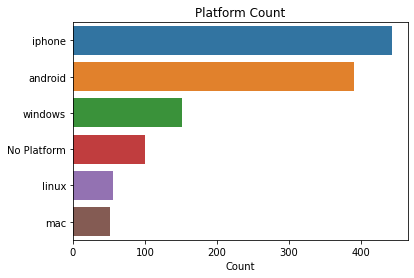

In [104]:
sns.barplot(x="platformType", y=platform.index, data = platform).set(xlabel = 'Count', title = 'Platform Count')

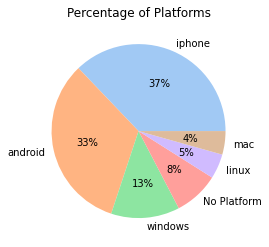

In [109]:
colors = sns.color_palette('pastel')
# create pie chart using matplotlib

plt.pie(platform['platformType'], labels=platform.index, colors=colors, autopct='%.0f%%')
plt.title("Percentage of Platforms")
plt.show()

[Text(0.5, 1.0, 'Total Purchase based on Platform Type')]

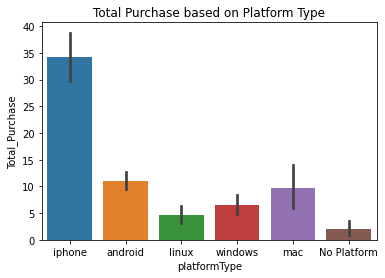

In [64]:
sns.barplot(x='platformType', y="Total_Purchase", data = df).set(title = "Total Purchase based on Platform Type")

[Text(0.5, 1.0, 'Purchase Count based on Platform Type')]

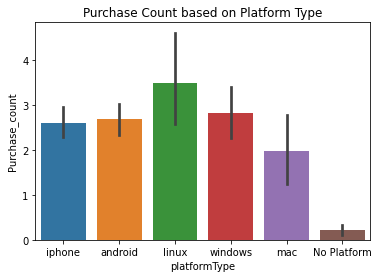

In [65]:
sns.barplot(x='platformType', y="Purchase_count", data = df).set(title = "Purchase Count based on Platform Type")

[Text(0.5, 1.0, 'Game Click Count based on Platform Type')]

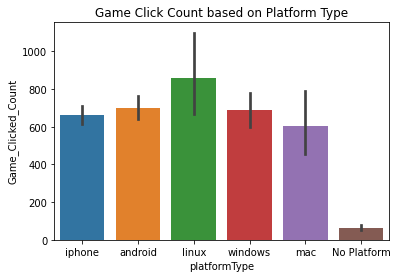

In [66]:
sns.barplot(x='platformType', y="Game_Clicked_Count", data = df).set(title = "Game Click Count based on Platform Type")

[Text(0.5, 1.0, 'Ad count based on Platform Type')]

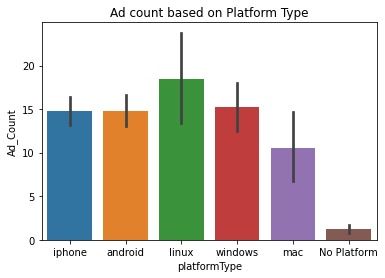

In [67]:
sns.barplot(x='platformType', y="Ad_Count", data = df).set(title = "Ad count based on Platform Type")

Histogram of Total Purchase

In [68]:
df

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,2015-11-27 16:36:39,1949-01-15,UZ,73,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17 03:25:44,1980-12-02,KM,42,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18 23:19:59,1982-02-21,PE,40,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09 21:42:29,1958-03-02,NI,64,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10 16:29:21,1994-01-15,GQ,28,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09 03:39:23,1957-02-12,SN,65,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16 07:53:04,1966-03-04,WS,56,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24 12:14:16,1996-05-02,PS,26,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25 06:50:30,1974-12-27,GU,48,iphone,0.000000,97,697,16,4,45.0,1


[Text(0.5, 1.0, 'Histogram of Total Purchase')]

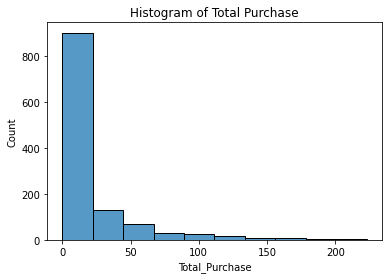

In [69]:
sns.histplot(data = df, x = 'Total_Purchase', bins = 10).set(title = "Histogram of Total Purchase")

Correlation Matrix

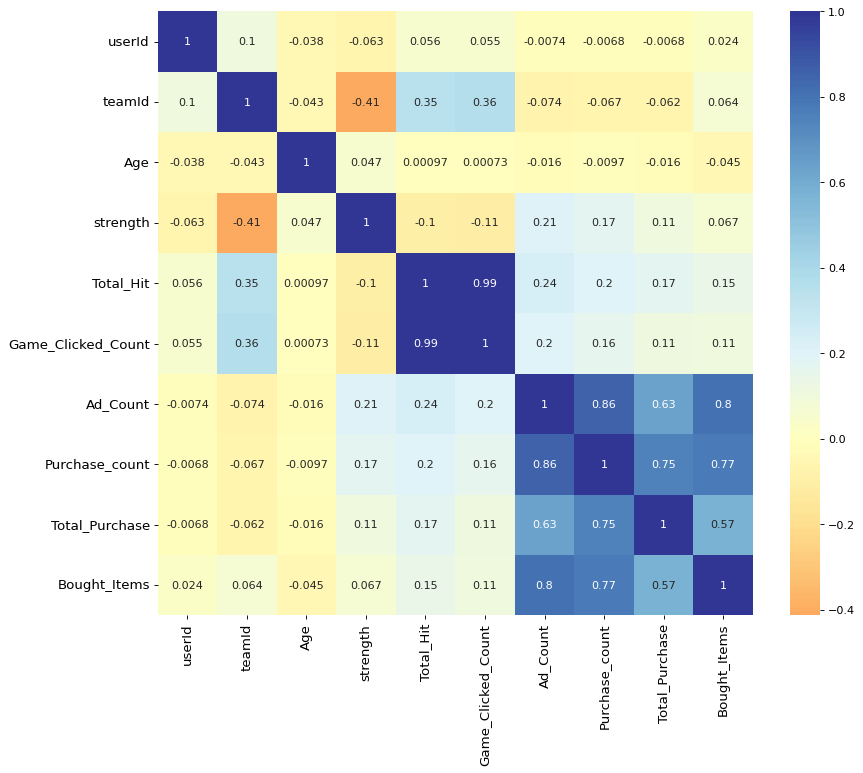

In [70]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlBu', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [71]:
corr = df.corr()
corr

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
userId,1.000000,0.102401,-0.037762,-0.063359,0.055774,0.055243,-0.007424,-0.006849,-0.006783,0.024040
teamId,0.102401,1.000000,-0.042509,-0.412918,0.346417,0.360210,-0.074031,-0.067295,-0.062042,0.064353
Age,-0.037762,-0.042509,1.000000,0.046874,0.000971,0.000727,-0.015920,-0.009695,-0.016419,-0.044957
strength,-0.063359,-0.412918,0.046874,1.000000,-0.104017,-0.112394,0.206659,0.174365,0.109963,0.066632
Total_Hit,0.055774,0.346417,0.000971,-0.104017,1.000000,0.989686,0.238130,0.201146,0.174218,0.145124
Game_Clicked_Count,0.055243,0.360210,0.000727,-0.112394,0.989686,1.000000,0.196261,0.156320,0.112354,0.108364
Ad_Count,-0.007424,-0.074031,-0.015920,0.206659,0.238130,0.196261,1.000000,0.855557,0.633422,0.804675
Purchase_count,-0.006849,-0.067295,-0.009695,0.174365,0.201146,0.156320,0.855557,1.000000,0.746827,0.774441
Total_Purchase,-0.006783,-0.062042,-0.016419,0.109963,0.174218,0.112354,0.633422,0.746827,1.000000,0.574682
Bought_Items,0.024040,0.064353,-0.044957,0.066632,0.145124,0.108364,0.804675,0.774441,0.574682,1.000000


Percentage of Bought Items

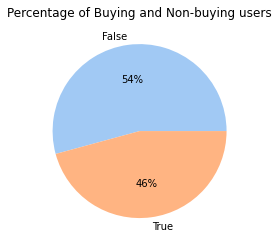

In [72]:
bought = df['Bought_Items'].value_counts()
colors = sns.color_palette('pastel')
# create pie chart using matplotlib
plt.pie(bought, labels=['False','True'], colors=colors, autopct='%.0f%%')
plt.title("Percentage of Buying and Non-buying users")
plt.show()

Distribution of the User Ages

[Text(0.5, 1.0, 'Histogram of user ages')]

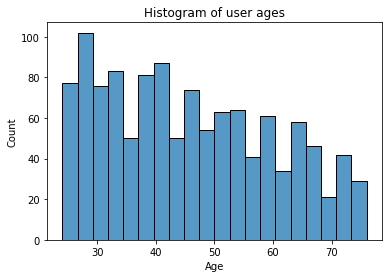

In [73]:
age  = df[['userId','Age']]
age.groupby('Age').count()
sns.histplot(data = age, x = 'Age', bins = 20).set(title = "Histogram of user ages")

In [74]:
df

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,2015-11-27 16:36:39,1949-01-15,UZ,73,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17 03:25:44,1980-12-02,KM,42,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18 23:19:59,1982-02-21,PE,40,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09 21:42:29,1958-03-02,NI,64,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10 16:29:21,1994-01-15,GQ,28,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09 03:39:23,1957-02-12,SN,65,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16 07:53:04,1966-03-04,WS,56,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24 12:14:16,1996-05-02,PS,26,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25 06:50:30,1974-12-27,GU,48,iphone,0.000000,97,697,16,4,45.0,1


Top 5 user with most hits

In [75]:
hit_user = df[['userId','Total_Hit']]
hit_user = hit_user.groupby('userId').sum()
hit_user.sort_values(by = 'Total_Hit', ascending=False, inplace=True)
hit_user.head(5)

,Total_Hit
userId,
436,517
2356,504
1418,497
911,419
1000,403


Top 5 team with most hits

In [76]:
team_hit = df[['teamId','Total_Hit']]
team_hit = team_hit.groupby('teamId').sum()
team_hit.sort_values(by='Total_Hit', ascending=False, inplace=True)
team_hit.head(5)

,Total_Hit
teamId,
39,1048
36,1044
11,1022
85,1000
28,1000


Top 5 teams with the highest strength

In [77]:
power = df[['teamId','strength']]
power = power.groupby('teamId').sum()
power.sort_values(by='strength', ascending=False, inplace=True)
power.head(5)

,strength
teamId,
18,21.251277
35,19.229414
9,19.043511
99,16.074971
13,15.941975


Top 5 teams with highest number of users

In [78]:
team = df[df.teamId > 0]
team = team[['userId','teamId']]
team = team.groupby('teamId').count()
team.sort_values(by='userId', ascending=False, inplace=True)
team.head(5)

,userId
teamId,
22,33
18,24
35,23
64,23
53,23


In [126]:
df

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,2015-11-27 16:36:39,1949-01-15,UZ,73,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17 03:25:44,1980-12-02,KM,42,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18 23:19:59,1982-02-21,PE,40,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09 21:42:29,1958-03-02,NI,64,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10 16:29:21,1994-01-15,GQ,28,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09 03:39:23,1957-02-12,SN,65,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16 07:53:04,1966-03-04,WS,56,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24 12:14:16,1996-05-02,PS,26,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25 06:50:30,1974-12-27,GU,48,iphone,0.000000,97,697,16,4,45.0,1


In [136]:
top_buy = df[['userId','Total_Purchase']]
top_buy = top_buy[top_buy['Total_Purchase'] != 0]
top_buy.sort_values(by='Total_Purchase', ascending=False, inplace=True)
top_buy.head(5)

,userId,Total_Purchase
1101,2229,223.0
7,12,215.0
245,471,202.0
261,511,200.0
511,1027,189.0


#Supervised Machine Learning

#Naive Bayes

In [79]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [80]:
#Delete Unused columns
del df['timestamp']
del df['dob']
del df['country']
del df['platformType']

In [81]:
df_spark = spark.createDataFrame(df)
df_spark.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_Items
0,0,157,73,0.000000,143,1355,0,0,0.0,0
1,1,99,42,0.893054,96,716,44,9,21.0,1
2,2,22,40,0.472692,22,231,0,0,0.0,0
3,6,77,64,0.793839,16,151,0,0,0.0,0
4,8,124,28,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,65,0.908269,141,1270,46,4,18.0,1
1189,2384,27,56,0.141377,81,558,48,8,36.0,1
1190,2386,77,26,0.793839,32,272,19,1,3.0,1
1191,2387,157,48,0.000000,97,697,16,4,45.0,1


In [82]:
df_spark.dtypes

[('userId', 'bigint'),
 ('teamId', 'bigint'),
 ('Age', 'bigint'),
 ('strength', 'double'),
 ('Total_Hit', 'bigint'),
 ('Game_Clicked_Count', 'bigint'),
 ('Ad_Count', 'bigint'),
 ('Purchase_count', 'bigint'),
 ('Total_Purchase', 'double'),
 ('Bought_Items', 'bigint')]

In [83]:
df_spark = df_spark.withColumn("userId", df_spark.userId.cast('int'))
df_spark = df_spark.withColumn("teamId", df_spark.teamId.cast('int'))
df_spark = df_spark.withColumn("Age", df_spark.Age.cast('int'))
df_spark = df_spark.withColumn("strength", df_spark.strength.cast('double'))
df_spark = df_spark.withColumn("Total_Hit", df_spark.Total_Hit.cast('int'))
df_spark = df_spark.withColumn("Game_Clicked_Count", df_spark.Game_Clicked_Count.cast('int'))
df_spark = df_spark.withColumn("Ad_Count", df_spark.Ad_Count.cast('int'))
df_spark = df_spark.withColumn("Purchase_count", df_spark.Purchase_count.cast('int'))
df_spark = df_spark.withColumn("Bought_Items", df_spark.Bought_Items.cast('int'))
df_spark = df_spark.withColumnRenamed("Bought_Items","label")

In [84]:
df_spark.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label
0,0,157,73,0.000000,143,1355,0,0,0.0,0
1,1,99,42,0.893054,96,716,44,9,21.0,1
2,2,22,40,0.472692,22,231,0,0,0.0,0
3,6,77,64,0.793839,16,151,0,0,0.0,0
4,8,124,28,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,65,0.908269,141,1270,46,4,18.0,1
1189,2384,27,56,0.141377,81,558,48,8,36.0,1
1190,2386,77,26,0.793839,32,272,19,1,3.0,1
1191,2387,157,48,0.000000,97,697,16,4,45.0,1


In [85]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
assembler = VectorAssembler(inputCols=['Age','strength','Total_Hit','Game_Clicked_Count','Ad_Count','Purchase_count'], outputCol='features')

# Consolidate predictor columns
df_trans = assembler.transform(df_spark)

# Check the resulting column
df_trans.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features
0,0,157,73,0.000000,143,1355,0,0,0.0,0,"[73.0, 0.0, 143.0, 1355.0, 0.0, 0.0]"
1,1,99,42,0.893054,96,716,44,9,21.0,1,"[42.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0]"
2,2,22,40,0.472692,22,231,0,0,0.0,0,"[40.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0]"
3,6,77,64,0.793839,16,151,0,0,0.0,0,"[64.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0]"
4,8,124,28,0.000000,38,380,10,5,53.0,1,"[28.0, 0.0, 38.0, 380.0, 10.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,65,0.908269,141,1270,46,4,18.0,1,"[65.0, 0.908268818406, 141.0, 1270.0, 46.0, 4.0]"
1189,2384,27,56,0.141377,81,558,48,8,36.0,1,"[56.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0]"
1190,2386,77,26,0.793839,32,272,19,1,3.0,1,"[26.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0]"
1191,2387,157,48,0.000000,97,697,16,4,45.0,1,"[48.0, 0.0, 97.0, 697.0, 16.0, 4.0]"


In [86]:
splits = df_trans.randomSplit([0.8,0.2], 42)    # optional value 42 is seed for sampling
train_df = splits[0]
test_df = splits[1]

training_ratio = train_df.count() / df_trans.count()
print(training_ratio)

0.8256496227996647


In [87]:
# Apply the Naive bayes classifier
nb = NaiveBayes(modelType="multinomial")

#Train the NB model
nbmodel = nb.fit(train_df)

#Predict the NB model with Train dataset
predictions_df = nbmodel.transform(test_df)
predictions_df.show(5)

+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+--------------------+--------------------+----------+
|userId|teamId|Age|      strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|label|            features|       rawPrediction|         probability|prediction|
+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+--------------------+--------------------+----------+
|     2|    22| 40| 0.47269158141|       22|               231|       0|             0|           0.0|    0|[40.0,0.472691581...|[-204.59889901403...|[0.99999998709481...|       0.0|
|    10|   131| 25|           0.0|      340|              3107|      19|            10|          11.0|    1|[25.0,0.0,340.0,3...|[-1691.5997923854...|[7.18627953948696...|       1.0|
|    13|    78| 74|0.796923109534|       48|               469|      16|             

In [88]:
# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
nbaccuracy = evaluator.evaluate(predictions_df)
print("Accuracy = " + str(nbaccuracy))

#Compute F1-Score on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
nbf1 = evaluator.evaluate(predictions_df)
print("F1-score = " + str(nbf1))

#Compute Precision on the Test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
nbpres = evaluator.evaluate(predictions_df)
print("Precision = " + str(nbpres))

#Compute Recall on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
nbrecall = evaluator.evaluate(predictions_df)
print("Recall = " + str(nbrecall))

Accuracy = 0.9423076923076923
F1-score = 0.9423290361137198
Precision = 0.9430473372781065
Recall = 0.9423076923076923


In [162]:
value = [nbaccuracy, nbf1, nbpres, nbrecall]
metric = ['Accuracy', "F1-Score", "Precision", "Recall"]
metrics = list(zip(metric, value))
metrics = pd.DataFrame(metrics, columns = ['Metric', 'Value'])

In [154]:
metrics

,Metric,Value
0,Accuracy,0.942308
1,F1-Score,0.942329
2,Precision,0.943047
3,Recall,0.942308


In [158]:
metrics['Value'] = metrics['Value'].astype(str)

In [169]:
metrics.dtypes

Metric     object
Value     float64
dtype: object

<class 'float'>


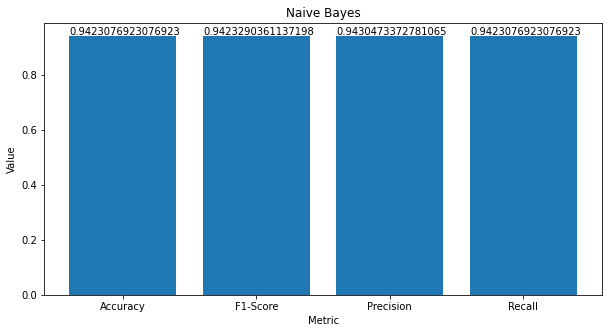

In [178]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(metrics["Metric"],metrics["Value"])
ax.set_title("Naive Bayes")
ax.set_ylabel("Value")
ax.set_xlabel("Metric")
print(type(value[1]))

for i, y in enumerate(ax.patches):
  ax.text(y.get_x(), y.get_height() + 0.005, str(value[i]), fontsize=10)

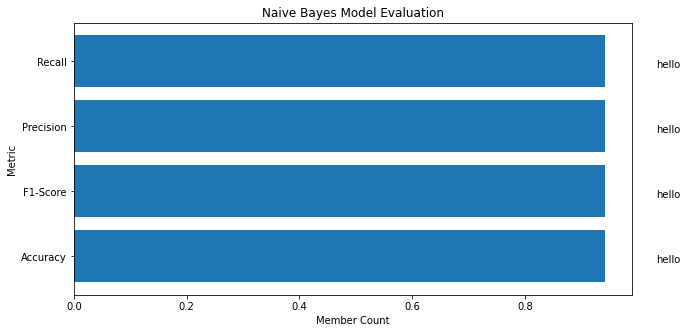

In [165]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(metrics["Metric"], metrics["Value"])

ax.set_title("Naive Bayes Model Evaluation")
ax.set_ylabel("Metric")
ax.set_xlabel("Member Count")


for i, y in enumerate(ax.patches):
  ax.text(y.get_width()+.09, y.get_y()+.3, "hello", fontsize=10)

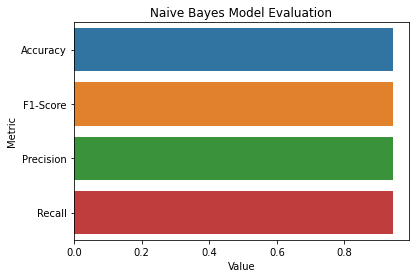

In [118]:
ax = sns.barplot(x="Value", y = "Metric", data = metrics, errwidth=0).set(title = "Naive Bayes Model Evaluation")


#Unsupervised Machine Learning

#K-Means Clustering

In [119]:
#No need to do VectorAssembler as it has been done in Naive Bayes Classification
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
df_scalar=scale.fit(df_trans)
df_scalar_output = df_scalar.transform(df_trans)
df_scalar_output.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features,standardized
0,0,157,73,0.000000,143,1355,0,0,0.0,0,"[73.0, 0.0, 143.0, 1355.0, 0.0, 0.0]","[5.109099258877747, 0.0, 2.1779050141890006, 2..."
1,1,99,42,0.893054,96,716,44,9,21.0,1,"[42.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0]","[2.939481765381718, 2.6583896488533307, 1.4620..."
2,2,22,40,0.472692,22,231,0,0,0.0,0,"[40.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0]","[2.7995064432206833, 1.407080104810591, 0.3350..."
3,6,77,64,0.793839,16,151,0,0,0.0,0,"[64.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0]","[4.4792103091530935, 2.363054053903734, 0.2436..."
4,8,124,28,0.000000,38,380,10,5,53.0,1,"[28.0, 0.0, 38.0, 380.0, 10.0, 5.0]","[1.9596545102544785, 0.0, 0.5787439897844896, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,65,0.908269,141,1270,46,4,18.0,1,"[65.0, 0.908268818406, 141.0, 1270.0, 46.0, 4.0]","[4.54919797023361, 2.703680442936421, 2.147444..."
1189,2384,27,56,0.141377,81,558,48,8,36.0,1,"[56.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0]","[3.919309020508957, 0.42084151214960464, 1.233..."
1190,2386,77,26,0.793839,32,272,19,1,3.0,1,"[26.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0]","[1.8196791880934442, 2.363054053903734, 0.4873..."
1191,2387,157,48,0.000000,97,697,16,4,45.0,1,"[48.0, 0.0, 97.0, 697.0, 16.0, 4.0]","[3.3594077318648203, 0.0, 1.4773201844498813, ..."


In [120]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    KMeans_fit = KMeans_algo.fit(df_scalar_output)
    output = KMeans_fit.transform(df_scalar_output)
    score = evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

Silhouette Score: 0.49878709450106934
Silhouette Score: 0.5406639574019569
Silhouette Score: 0.42939068178003875
Silhouette Score: 0.3792174031382355
Silhouette Score: 0.37847390073682974
Silhouette Score: 0.37058849780865455
Silhouette Score: 0.38601873640804035
Silhouette Score: 0.381819321581645


Text(0, 0.5, 'cost')

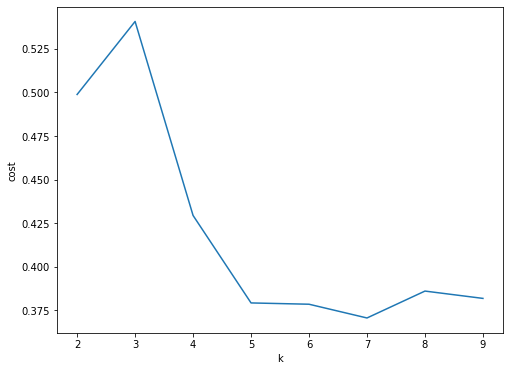

In [121]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

Highest value when k = 3

In [179]:
final_clustering = KMeans(featuresCol='standardized', k=3)
KMeans_fit = final_clustering.fit(df_scalar_output)
clusters_output=KMeans_fit.transform(df_scalar_output)
clusters_output.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features,standardized,prediction
0,0,157,73,0.000000,143,1355,0,0,0.0,0,"[73.0, 0.0, 143.0, 1355.0, 0.0, 0.0]","[5.109099258877747, 0.0, 2.1779050141890006, 2...",1
1,1,99,42,0.893054,96,716,44,9,21.0,1,"[42.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0]","[2.939481765381718, 2.6583896488533307, 1.4620...",2
2,2,22,40,0.472692,22,231,0,0,0.0,0,"[40.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0]","[2.7995064432206833, 1.407080104810591, 0.3350...",0
3,6,77,64,0.793839,16,151,0,0,0.0,0,"[64.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0]","[4.4792103091530935, 2.363054053903734, 0.2436...",0
4,8,124,28,0.000000,38,380,10,5,53.0,1,"[28.0, 0.0, 38.0, 380.0, 10.0, 5.0]","[1.9596545102544785, 0.0, 0.5787439897844896, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,65,0.908269,141,1270,46,4,18.0,1,"[65.0, 0.908268818406, 141.0, 1270.0, 46.0, 4.0]","[4.54919797023361, 2.703680442936421, 2.147444...",2
1189,2384,27,56,0.141377,81,558,48,8,36.0,1,"[56.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0]","[3.919309020508957, 0.42084151214960464, 1.233...",2
1190,2386,77,26,0.793839,32,272,19,1,3.0,1,"[26.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0]","[1.8196791880934442, 2.363054053903734, 0.4873...",0
1191,2387,157,48,0.000000,97,697,16,4,45.0,1,"[48.0, 0.0, 97.0, 697.0, 16.0, 4.0]","[3.3594077318648203, 0.0, 1.4773201844498813, ...",0
